# Supervised Machine Learning: Linear Regression

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

## 1. Load Data

In [2]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

In [3]:
duncan_prestige.data.head()

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [4]:
y_train = duncan_prestige.data['income'].values
X_train = duncan_prestige.data['education'].values

## 2. OLS

- OLS help us in identifying the more significant features that can has an influence on the output. 
- The higher the t-value for the feature, the more significant the feature is to the output variable.
- If the p-value is less than 0.05(95% confidence interval) for a feature, then we can consider the feature to be significant.

In [5]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X)
results = model.fit()

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.84e-08
Time:                        23:03:58   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

## 3. Linear Regression

We will obtain very similar results to the ones obtained from OLS

In [7]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1,1)

In [8]:
y_train.reshape(1,-1)

array([[62, 72, 75, 55, 64, 21, 64, 80, 67, 72, 42, 76, 76, 41, 48, 76,
        53, 60, 42, 78, 29, 48, 55, 29, 21, 47, 81, 36, 22, 44, 15,  7,
        42,  9, 21, 21, 16, 16,  9, 14, 12, 17,  7, 34,  8]])

In [9]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [10]:
lr_model.score(X_train, y_train)

0.5249181546907554

In [11]:
prediction = lr_model.predict(X_train)

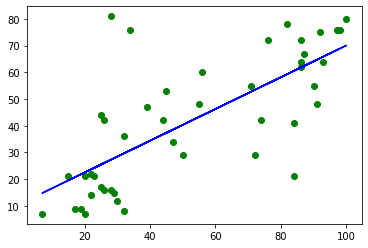

In [12]:
plt.scatter(X_train, y_train,  color='green')
plt.plot(X_train, prediction,  color='blue')
plt.show()

## 4. L1 Regularization - Lasso

Sometimes the model that is trained which will fit the data but it may fail and give a poor performance during analyzing of data (test data). This leads to overfitting. Regularization came to overcome overfitting.

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “Absolute value of magnitude” of coefficient, as penalty term to the loss function.
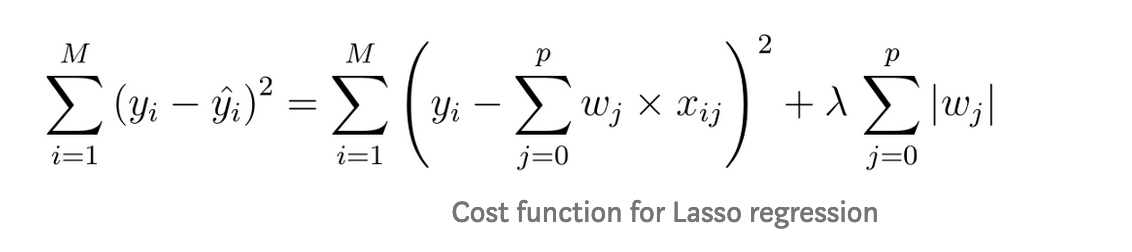

In [13]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.5249161767998722

In [14]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
lasso001.score(X_train,y_train)

0.5249181544929662

## 5. L2 Regularization - Ridge Regression

Overfitting happens when the model learns signal as well as noise in the training data and wouldn’t perform well on new/unseen data on which model wasn’t trained on. To avoid overfitting your model on training data like cross-validation sampling, reducing the number of features, pruning, regularization, etc.

Regularization adds the penalty as model complexity increases. The regularization parameter (lambda) penalizes all the parameters except intercept so that the model generalizes the data and won’t overfit.

Ridge regression adds “squared magnitude of the coefficient". Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

Difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are completely neglected


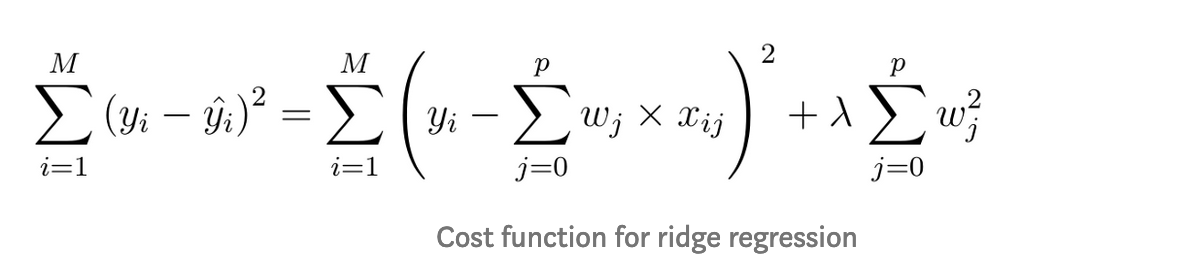

In [15]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr.score(X_train,y_train)

0.5249181546907209

In [16]:
#  comparison with alpha value
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)
rr100.score(X_train,y_train)

0.524914716103339

## 

## 6. Support Vector Regression

In simple linear regression, try to minimize the error rate. But in SVR, we try to fit the error within a certain threshold.

Our best fit line is the one where the hyperplane has the maximum number of points.
We are trying to do here is trying to decide a decision boundary at ‘e’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

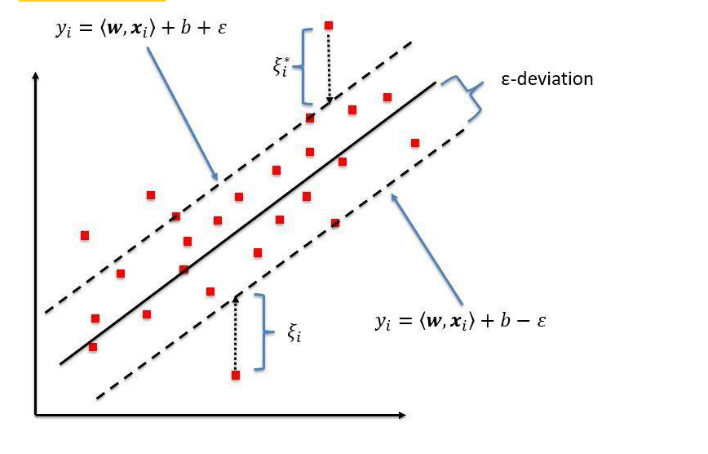

In [27]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin_model = svr_lin.fit(X_train, y_train)

/Users/albertogarcia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


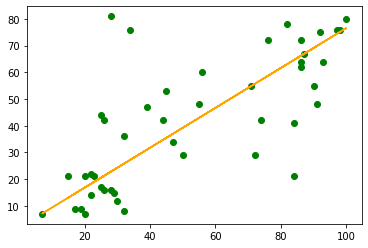

In [28]:
plt.scatter(X_train, y_train,  color='green')
plt.plot(X_train, svr_lin_model.predict(X_train),  color='orange')
plt.show()